In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

df = pd.read_csv('preprocessed.csv')

In [15]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

X=df.drop('price',axis=1)
y=df['price']

cv_5_results  = list(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results = list(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = list(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))

In [16]:
print(cv_5_results,cv_10_results,cv_20_results)

[-0.16679358267955402, -0.16696191263183818, -0.15946404834253786, -0.16808376277186854, -0.1452909909360829] [-0.157542607328654, -0.17553296406715674, -0.16353755678290952, -0.1699264303326099, -0.15585956613807253, -0.162680797678678, -0.16557945938800395, -0.16990156577284893, -0.16386359792837743, -0.12771675230040203] [-0.1410954524383938, -0.17414496401721036, -0.16864704891717952, -0.18316631097223432, -0.16569109436513502, -0.16135373444817838, -0.15904387040255855, -0.1804191423878617, -0.1683340912728034, -0.14334708114494185, -0.15535367971964387, -0.16987334548619495, -0.17031692544993782, -0.16080980550291069, -0.17438054610368467, -0.16548109379194711, -0.1703017161328434, -0.1570197168423664, -0.12741890340375472, -0.12196224921732224]


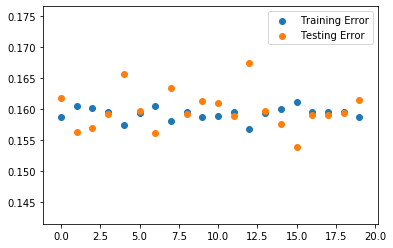

In [9]:
num = 20
train_err = []
test_err = []
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend();

### What information to share??
- most impactful factors: sqft_living, waterfront, location (also condition, bedrooms, sqft_basement)
- show correlation of sqft_living to price 1st sns (kind = reg) Blake
- best/worst month to buy??

### Visualizations
- sqft to price
- heatmap to show multicollinearity
- how to show why we picked what we picked?? Maybe get pvalues and plot them somehow??
- maybe just a table? Or distribution of pvalues? Maybe bar or histogram
- price, before and after log transform
- heterodasticity me

- heatmap - abs, .4 cutoff 2nd me
- 

In [12]:
import pickle
with open('model.pickle', 'rb') as f:
    model = pickle.load(f)

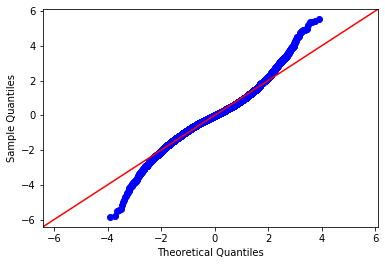

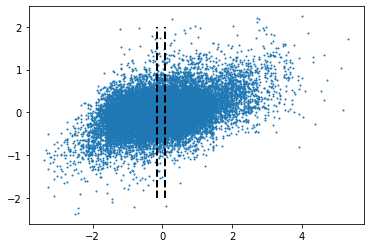

In [31]:
import scipy.stats as stats
y_pred = model.predict(df.drop(['price'],axis=1))
resids = df['price']-y_pred
fig = sm.graphics.qqplot(resids, dist=stats.norm, line='45', fit=True)
plt.show()

plt.figure()
plt.scatter(df['price'],resids,s=1)
lwr_thresh = df.price.quantile(q=.45)
upr_thresh = df.price.quantile(q=.55)
plt.vlines(lwr_thresh, ymax=2, ymin=-2, linestyles='dashed',linewidth=2)
plt.vlines(upr_thresh, ymax=2, ymin=-2, linestyles='dashed',linewidth=2)
plt.show()

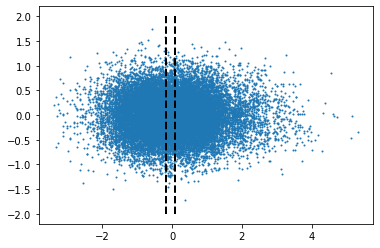

In [33]:
unpaired_data = np.random.normal(loc=np.mean(resids),scale=np.std(resids),size=len(resids))
plt.figure()
plt.scatter(df['price'],unpaired_data,s=1)
lwr_thresh = df.price.quantile(q=.45)
upr_thresh = df.price.quantile(q=.55)
plt.vlines(lwr_thresh, ymax=2, ymin=-2, linestyles='dashed',linewidth=2)
plt.vlines(upr_thresh, ymax=2, ymin=-2, linestyles='dashed',linewidth=2)
plt.show()

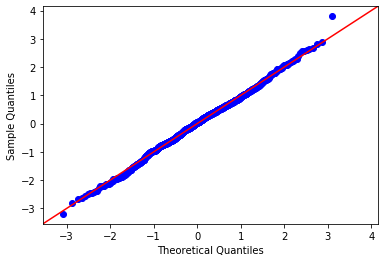

In [30]:
rands = np.random.normal(size=1000)

fig = sm.graphics.qqplot(rands, dist=stats.norm, line='45', fit=True)
plt.show()